In [114]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats import diagnostic
raw_data = pd.read_csv('kc_house_data.csv', index_col=0)

In [115]:
raw_data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [116]:
desired_columns = ['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','condition','grade','yr_built']
data = raw_data[desired_columns]

In [117]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built
id,,,,,,,,,
7129300520,221900.0,3,1.00,1180,5650,1.0,3,7,1955
6414100192,538000.0,3,2.25,2570,7242,2.0,3,7,1951
5631500400,180000.0,2,1.00,770,10000,1.0,3,6,1933
2487200875,604000.0,4,3.00,1960,5000,1.0,5,7,1965
1954400510,510000.0,3,2.00,1680,8080,1.0,3,8,1987


In [118]:
data.reset_index(drop=True, inplace=True)
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built
0,221900.0,3,1.00,1180,5650,1.0,3,7,1955
1,538000.0,3,2.25,2570,7242,2.0,3,7,1951
2,180000.0,2,1.00,770,10000,1.0,3,6,1933
3,604000.0,4,3.00,1960,5000,1.0,5,7,1965
4,510000.0,3,2.00,1680,8080,1.0,3,8,1987


In [119]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,3.409825,7.657915,1970.999676
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.650546,1.173200,29.375234
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,1.000000,3.000000,1900.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,3.000000,7.000000,1951.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,3.000000,7.000000,1975.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,4.000000,8.000000,1997.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,5.000000,13.000000,2015.000000


In [120]:
print(data.isnull().sum())

price          0
bedrooms       0
bathrooms      0
sqft_living    0
sqft_lot       0
floors         0
condition      0
grade          0
yr_built       0
dtype: int64


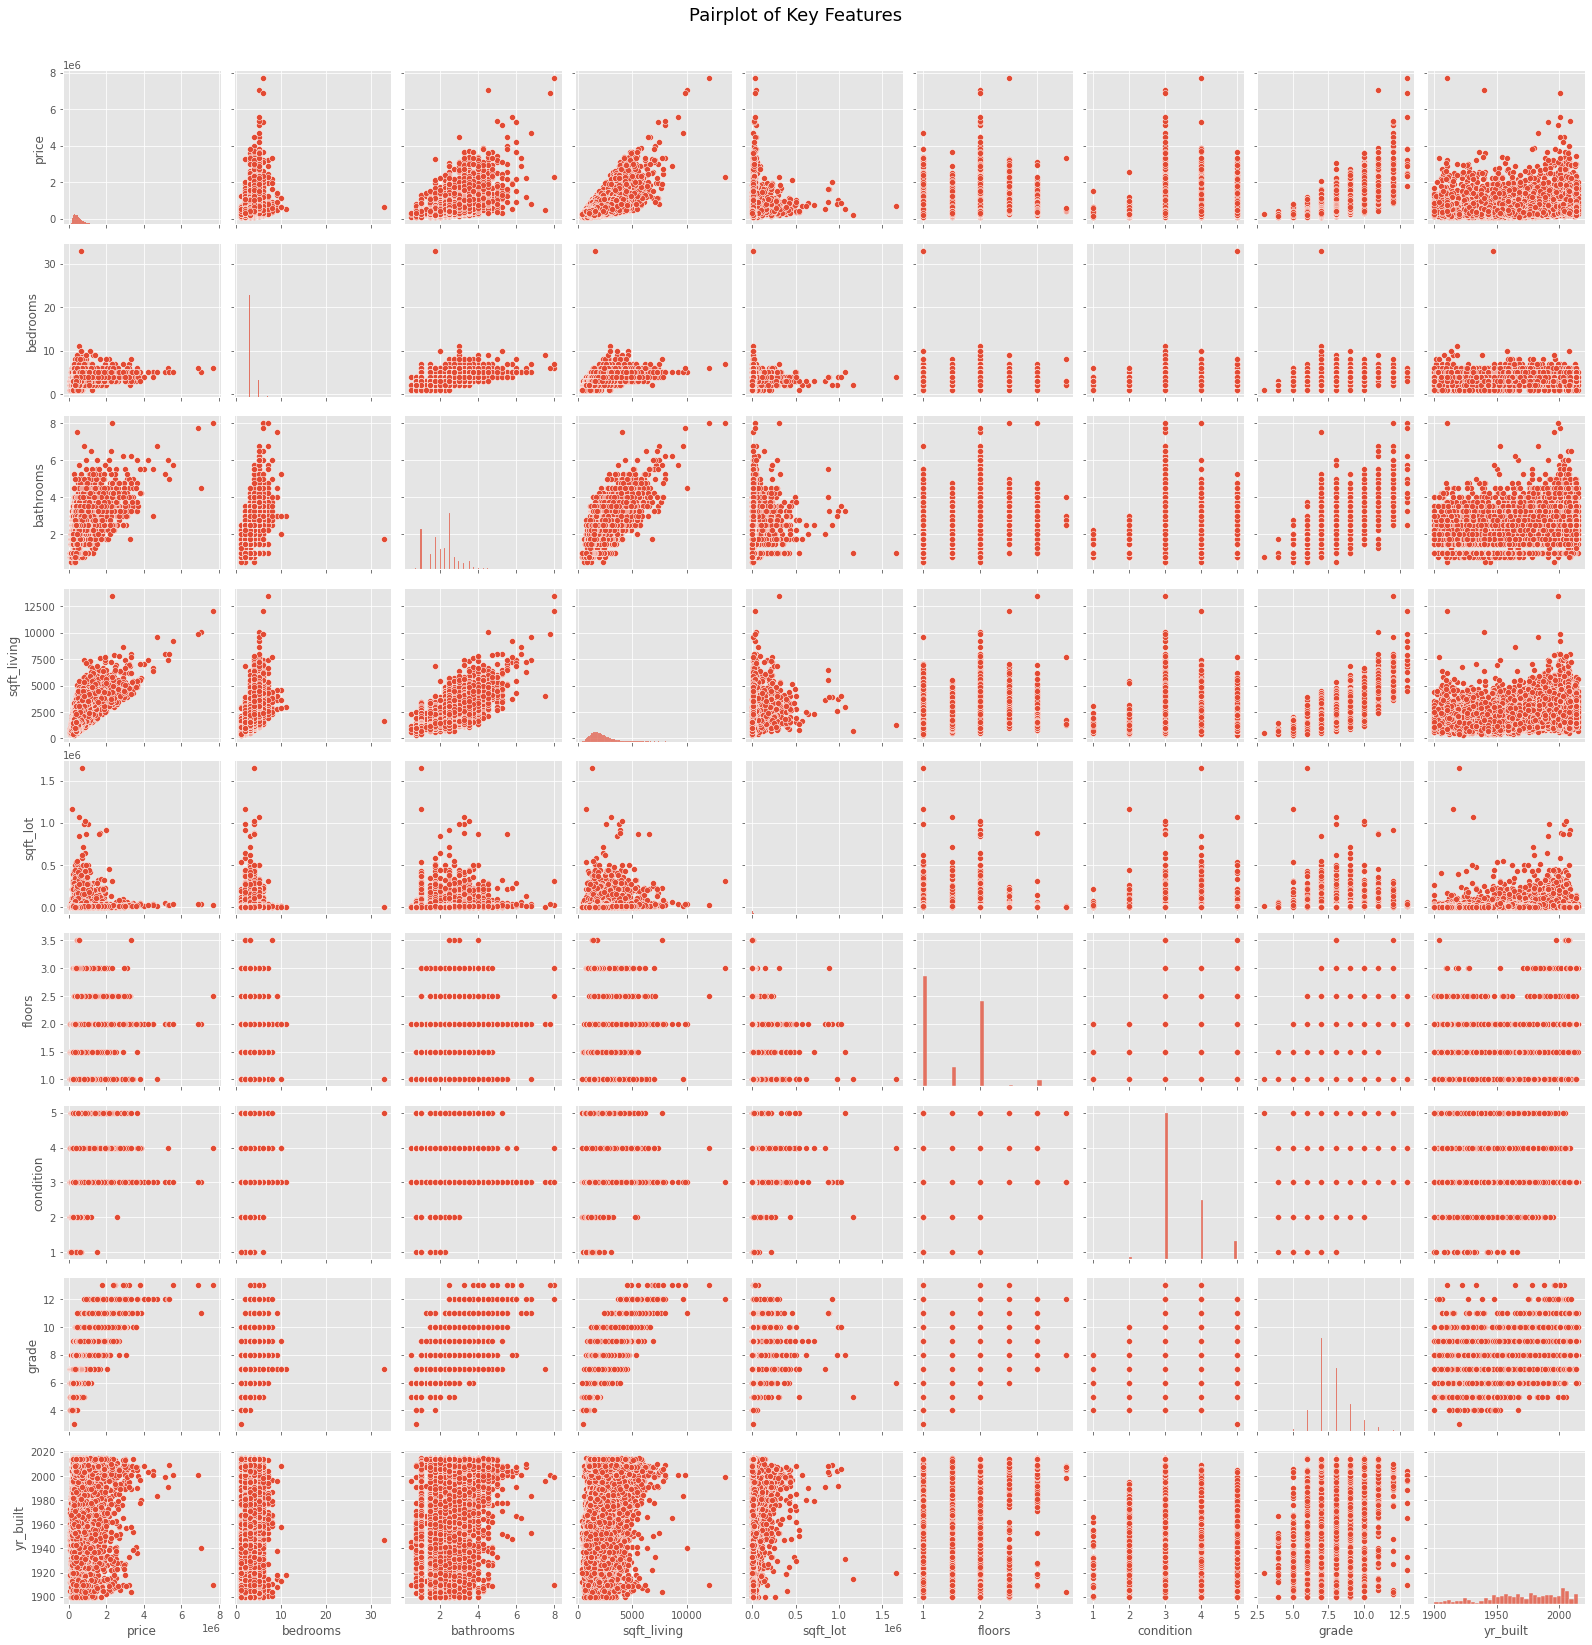

In [121]:
## Explore relationships between key features and the target variable
sns.pairplot(data)
plt.suptitle("Pairplot of Key Features", y=1.02, size=18)
plt.show()

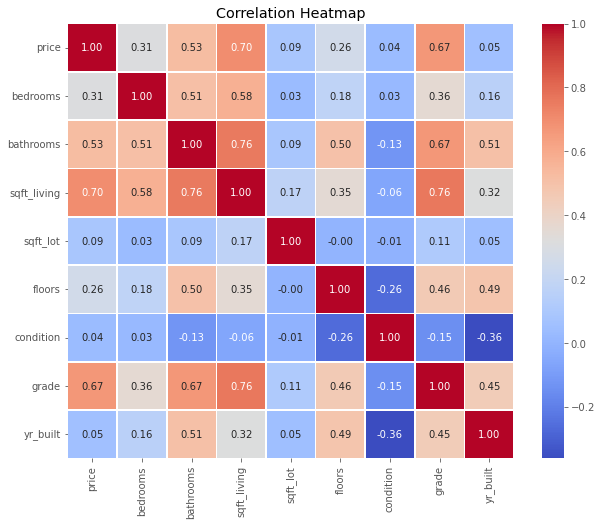

In [122]:
## Correlation heatmap to visualize the correlation between features
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

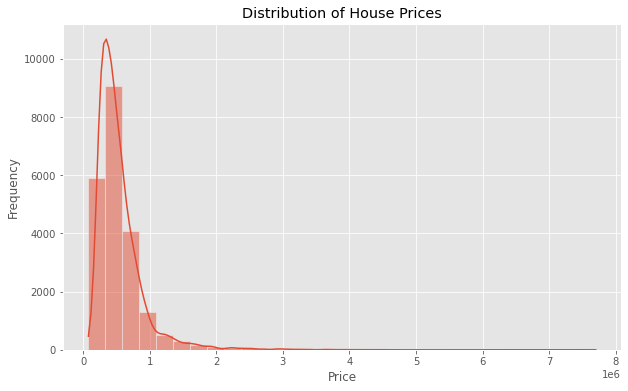

In [123]:
## Distribution of the target variable 'price'
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], bins=30, kde=True)
plt.title("Distribution of House Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

In [124]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# Define a boolean mask to identify outliers
outlier_mask = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR)))

# Remove outliers
data_c= data[~outlier_mask.any(axis=1)]

# Display the shape of the original and cleaned datasets
print("Original dataset shape:", data.shape)
print("Cleaned dataset shape:", data_c.shape)

Original dataset shape: (21597, 9)
Cleaned dataset shape: (17006, 9)


In [185]:
data_c.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built
0,221900.0,3,1.00,1180,5650,1.0,3,7,1955
1,538000.0,3,2.25,2570,7242,2.0,3,7,1951
2,180000.0,2,1.00,770,10000,1.0,3,6,1933
3,604000.0,4,3.00,1960,5000,1.0,5,7,1965
4,510000.0,3,2.00,1680,8080,1.0,3,8,1987


In [125]:
# Replace 'target_column' with the actual name of your target variable
X = data_c.drop('price', axis=1)
y = data_c['price']

## Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [126]:
## Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create a baseline linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

## Model Evaluation
y_pred_train = model.predict(X_train)
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

y_pred_test = model.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print("Training Set Evaluation:")
print(f'Mean Squared Error: {mse_train}')
print(f'R-squared: {r2_train}')

print("\nTesting Set Evaluation:")
print(f'Mean Squared Error: {mse_test}')
print(f'R-squared: {r2_test}')


Training Set Evaluation:
Mean Squared Error: 17992424817.845284
R-squared: 0.5148426268903326

Testing Set Evaluation:
Mean Squared Error: 16930258438.647326
R-squared: 0.5220244988232811


In [127]:
## Statsmodels for additional analysis
X_train_with_intercept = sm.add_constant(X_train)
stats_model = sm.OLS(y_train, X_train_with_intercept).fit()
adjusted_r_squared = stats_model.rsquared_adj
print("\nAdjusted R-squared (Statsmodels):", adjusted_r_squared)
stats_model.summary()


Adjusted R-squared (Statsmodels): 0.5145571352401026


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.515
Model:                            OLS   Adj. R-squared:                  0.515
Method:                 Least Squares   F-statistic:                     1803.
Date:                Sun, 26 Nov 2023   Prob (F-statistic):               0.00
Time:                        17:49:15   Log-Likelihood:            -1.7992e+05
No. Observations:               13604   AIC:                         3.599e+05
Df Residuals:                   13595   BIC:                         3.599e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.557e+05   1150.449    396.102      0.000    4.53e+05    4.58e+05
x1         -1.557e+04   1500.090    -10.382      0.000   -1.85e+04   -1.26e+04
x2          1.685e+04   1896.489      8.886      0.000    1.31e+04    2.06e+04
x3          7.361e+04   2001.664     36.776      0.000    6.97e+04    7.75e+04
x4         -2.457e+04   1356.681    -18.110      0.000   -2.72e+04   -2.19e+04
x5          1.018e+04   1602.909      6.353      0.000    7040.591    1.33e+04
x6          1.262e+04   1265.019      9.977      0.000    1.01e+04    1.51e+04
x7          8.947e+04   1658.715     53.939      0.000    8.62e+04    9.27e+04
x8         -8.366e+04   1583.086    -52.847      0.000   -8.68e+04   -8.06e+04
==============================================================================
Omnibus:                      729.804   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1093.463
Skew:                           0.473   Prob(JB):                    3.61e-238
Kurtosis:                       4.017   Cond. No.                         4.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

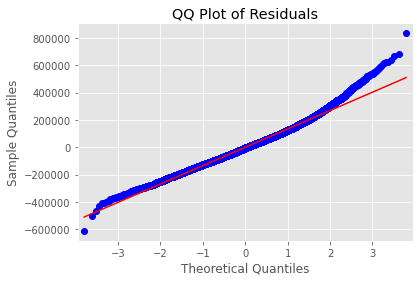

<Figure size 576x432 with 0 Axes>

In [128]:
## Validate assumptions
# QQ Plot
residuals = y_train - y_pred_train
qqplot(residuals, line='s')
plt.title("QQ Plot of Residuals")
plt.figure(figsize=(8, 6))
plt.show()


In [129]:
# Heteroscedasticity test
het_test = diagnostic.het_breuschpagan(residuals, X_train_with_intercept)
print("\nHeteroscedasticity Test:")
print("LM Statistic:", het_test[0])
print("p-value:", het_test[1])


Heteroscedasticity Test:
LM Statistic: 705.8313065736335
p-value: 3.974089881960101e-147


In [130]:
# Homoscedasticity test
homoscedasticity_test = diagnostic.het_goldfeldquandt(residuals, X_train_with_intercept)
print("\nHomoscedasticity Test:")
print("F Statistic:", homoscedasticity_test[0])
print("p-value:", homoscedasticity_test[1])


Homoscedasticity Test:
F Statistic: 0.9420090706562472
p-value: 0.9930843870311254


In [131]:
#Observations

#The results from the two tests seem contradictory.
#The Breusch-Pagan test strongly suggests the presence of heteroscedasticity.
#The Goldfeld-Quandt test suggests that there is not enough evidence to conclude the presence of heteroscedasticity.

#It's not uncommon to obtain different results from different heteroscedasticity tests.
#Consider the assumptions and limitations of each test.
#The sample size and characteristics of the data might influence the results.

In [132]:
# Approximately 51.4% of the variability in the dependent variable ("price") is explained by the independent variables
# p-values are very close to zero, indicating that all the coefficients are statistically significant

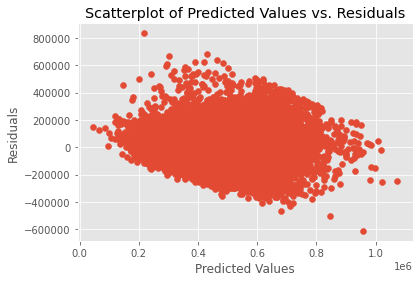

In [133]:
# Get predicted values
predicted_values = stats_model.fittedvalues

# Plot predicted values vs. residuals
plt.scatter(predicted_values, stats_model.resid)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Scatterplot of Predicted Values vs. Residuals")
plt.show()


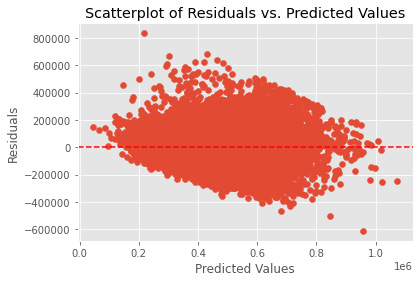

In [134]:
# Plot residuals vs. predicted values
plt.scatter(predicted_values, stats_model.resid)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Scatterplot of Residuals vs. Predicted Values")
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0 for reference
plt.show()


In [135]:
#In a homoscedastic model, you'd expect the spread of residuals to be approximately constant across 
#all levels of predicted values.

In [136]:
#The skewness and kurtosis values of the residuals are 3.353 and 39.007, respectively
#Interpretation: These values indicate non-normality and heavy tails in the distribution of residuals. 
#That is why have to investigate this further and consider transformations or additional variable selection.

In [137]:
## Identify multicollinearity of features and remove them
# Perform correlation analysis
correlation_matrix = X.corr()
high_correlation = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:
            colname = correlation_matrix.columns[i]
            high_correlation.add(colname)

# Remove highly correlated features
X_no_multicollinearity = X.drop(columns=high_correlation)


In [138]:
X_no_multicollinearity

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built
0,3,1.00,1180,5650,1.0,3,7,1955
1,3,2.25,2570,7242,2.0,3,7,1951
2,2,1.00,770,10000,1.0,3,6,1933
3,4,3.00,1960,5000,1.0,5,7,1965
4,3,2.00,1680,8080,1.0,3,8,1987
...,...,...,...,...,...,...,...,...
21592,3,2.50,1530,1131,3.0,3,8,2009
21593,4,2.50,2310,5813,2.0,3,8,2014
21594,2,0.75,1020,1350,2.0,3,7,2009
21595,3,2.50,1600,2388,2.0,3,8,2004


In [140]:
data_c['yr_built'].unique()

array([1955, 1951, 1933, 1965, 1987, 1995, 1963, 1960, 2003, 1942, 1977,
       1900, 1979, 1994, 1916, 1921, 1969, 1947, 1985, 1941, 1915, 1909,
       1948, 2005, 1929, 1981, 1930, 1904, 1996, 2000, 2014, 1922, 1959,
       1966, 1953, 1950, 1927, 2008, 1968, 1991, 1954, 1973, 1925, 1972,
       1956, 1992, 1964, 1952, 1961, 2006, 1988, 1962, 1939, 1946, 1967,
       1975, 1910, 1978, 1984, 1905, 1980, 1971, 2001, 2010, 1945, 1924,
       1990, 1926, 2004, 1986, 1923, 1976, 1999, 1901, 1949, 1993, 1920,
       2007, 1943, 1983, 1940, 1918, 1928, 1974, 1911, 1937, 1908, 1931,
       1957, 1998, 1913, 2013, 2002, 1907, 1997, 1958, 2012, 1989, 2011,
       1917, 1944, 1902, 2009, 1903, 1970, 1982, 1914, 2015, 1934, 1912,
       1938, 1919, 1932, 1906, 1936, 1935], dtype=int64)

In [141]:
# Define bins and labels for 'yr_built'
bins = [1900, 1950, 1970, 1990, 2010, 2023]  # You can adjust these based on your data
labels = ['1900-1950', '1951-1970', '1971-1990', '1991-2010', '2011-2023']

# Create a new column 'yr_built_group' with the specified bins and labels
X_no_multicollinearity['yr_built_group'] = pd.cut(X_no_multicollinearity['yr_built'], bins=bins, labels=labels, include_lowest=True)

# Create dummy variables for all categorical columns including the grouped 'yr_built'
categorical_columns_with_grouped_yr_built = ['bedrooms', 'bathrooms', 'floors', 'grade','condition', 'yr_built_group']

X_with_dummies = pd.get_dummies(X_no_multicollinearity, columns=categorical_columns_with_grouped_yr_built, drop_first=True)

X_with_dummies = X_with_dummies.drop('yr_built', axis=1)


In [142]:
## Run statsmodel and capture adjusted R-Squared
X_train_v1, X_test_v1, y_train_v1, y_test_v1 = train_test_split(X_with_dummies, y, test_size=0.2, random_state=42)
X_train_with_intercept_v1 = sm.add_constant(X_train_v1)
stats_model_v1 = sm.OLS(y_train, X_train_with_intercept_v1).fit()
adjusted_r_squared_v1 = stats_model_v1.rsquared_adj
print("\nAdjusted R-squared (Version 1):", adjusted_r_squared_v1)
stats_model_v1.summary()


Adjusted R-squared (Version 1): 0.5152250596460446


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.516
Model:                            OLS   Adj. R-squared:                  0.515
Method:                 Least Squares   F-statistic:                     467.4
Date:                Sun, 26 Nov 2023   Prob (F-statistic):               0.00
Time:                        17:56:02   Log-Likelihood:            -1.7990e+05
No. Observations:               13604   AIC:                         3.599e+05
Df Residuals:                   13572   BIC:                         3.601e+05
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     2.357e+05   3.35e+04      7.027      0.000     1.7e+05    3.01e+05
sqft_living                114.3823      3.201     35.735      0.000     108.108     120.656
sqft_lot                    -6.4613      0.420    -15.398      0.000      -7.284      -5.639
bedrooms_3               -2.269e+04   3946.822     -5.748      0.000   -3.04e+04    -1.5e+04
bedrooms_4               -3.782e+04   4756.447     -7.952      0.000   -4.71e+04   -2.85e+04
bedrooms_5               -5.284e+04   6784.928     -7.788      0.000   -6.61e+04   -3.95e+04
bathrooms_1.0            -3.976e+04   3.01e+04     -1.320      0.187   -9.88e+04    1.93e+04
bathrooms_1.25            3.813e+04   7.35e+04      0.519      0.604   -1.06e+05    1.82e+05
bathrooms_1.5            -2.642e+04   3.04e+04     -0.870      0.384   -8.59e+04    3.31e+04
bathrooms_1.75           -9939.0956   3.02e+04     -0.329      0.742   -6.92e+04    4.93e+04
bathrooms_2.0            -1.344e+04   3.03e+04     -0.444      0.657   -7.29e+04     4.6e+04
bathrooms_2.25           -3625.6877   3.04e+04     -0.119      0.905   -6.33e+04     5.6e+04
bathrooms_2.5            -9985.7973   3.04e+04     -0.328      0.743   -6.96e+04    4.96e+04
bathrooms_2.75             1.95e+04   3.07e+04      0.635      0.526   -4.07e+04    7.97e+04
bathrooms_3.0             2750.5099   3.11e+04      0.089      0.929   -5.81e+04    6.36e+04
bathrooms_3.25            3.124e+04   3.17e+04      0.984      0.325    -3.1e+04    9.35e+04
bathrooms_3.5             5.553e+04   3.16e+04      1.758      0.079   -6375.480    1.17e+05
floors_1.5                1.855e+04   4631.107      4.005      0.000    9471.250    2.76e+04
floors_2.0                1806.1578   3995.850      0.452      0.651   -6026.263    9638.579
floors_2.5                2.785e+04    1.7e+04      1.640      0.101   -5427.792    6.11e+04
floors_3.0                 6.47e+04   8015.175      8.072      0.000     4.9e+04    8.04e+04
floors_3.5                6.846e+04    5.5e+04      1.244      0.214   -3.94e+04    1.76e+05
grade_7                   1.059e+05   4404.318     24.042      0.000    9.73e+04    1.15e+05
grade_8                   2.084e+05   5250.093     39.691      0.000    1.98e+05    2.19e+05
grade_9                   3.377e+05   6711.442     50.321      0.000    3.25e+05    3.51e+05
condition_3               4.519e+04   1.45e+04      3.124      0.002    1.68e+04    7.35e+04
condition_4               6.333e+04   1.45e+04      4.360      0.000    3.49e+04    9.18e+04
condition_5               8.884e+04   1.49e+04      5.949      0.000    5.96e+04    1.18e+05
yr_built_group_1951-1970  -9.87e+04   3885.180    -25.405      0.000   -1.06e+05   -9.11e+04
yr_built_group_1971-1990 -1.566e+05   4348.566    -36.019      0.000   -1.65e+05   -1.48e+05
yr_built_group

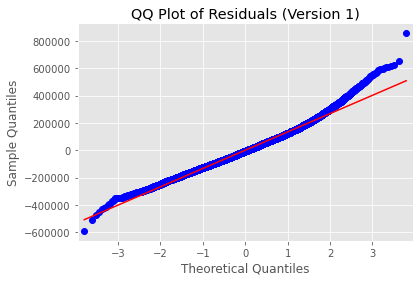

In [143]:
## Check the QQ plot
residuals_v1 = y_train - stats_model_v1.fittedvalues
qqplot(residuals_v1, line='s')
plt.title("QQ Plot of Residuals (Version 1)")
plt.show()


In [54]:
#observation
# Here not any of the pair has high_correlation(> 0.7)
#p-value < 0.05, indicating that they are likely important in predicting the target variable. 
#The F-statistic tests the overall significance of the model. The associated p-value is near zero
#suggesting that at least one predictor in the model has a non-zero coefficient.

In [261]:
## Log transformation and feature scaling for continuous variables
continuous_columns =['price','sqft_living','sqft_lot']
X_continuous = data_c[continuous_columns]
X_log_transformed = np.log1p(X_continuous)

categorical_columns_with_grouped_yr_built = ['bedrooms', 'bathrooms', 'floors', 'grade','condition', 'yr_built_group']
# Assuming 'categorical_columns' is a list of the names of categorical features
X_categorical = data_c[categorical_columns]

# Combine log-transformed continuous features and categorical features
X_combined = pd.concat([X_log_transformed, X_categorical], axis=1)
X_combined
temp_x = X_combined.drop('price', axis=1)

# Perform feature scaling on the log-transformed continuous features
scaler_v2 = StandardScaler()
X_scaled_v2 = scaler_v2.fit_transform(temp_x)
X_scaled_v2

array([[-1.10676697, -0.15120737, -0.35865028, ..., -0.50477749,
        -0.65009745, -0.50919133],
       [ 1.08375484,  0.26167698, -0.35865028, ..., -0.50477749,
        -0.65009745, -0.64450253],
       [-2.30751348,  0.79840292, -1.63945805, ..., -1.72969843,
        -0.65009745, -1.25340293],
       ...,
       [-1.51669149, -2.5316476 , -1.63945805, ..., -0.50477749,
        -0.65009745,  1.31750985],
       [-0.25000561, -1.58340596, -0.35865028, ...,  0.72014345,
        -0.65009745,  1.14837085],
       [-1.51669149, -2.90870475, -1.63945805, ..., -0.50477749,
        -0.65009745,  1.28368205]])

In [292]:
# Separate the target variable 'price'
y_v2 = data_c['price']

# Split into training and testing sets for features and target variable
X_train_v2, X_test_v2, y_train_v2, y_test_v2 = train_test_split(X_scaled_v2, y_v2, test_size=0.2, random_state=42)

model_v2 = LinearRegression()
model_v2.fit(X_train_v2, y_train_v2)

y_pred_train_v2 = model_v2.predict(X_train_v2)
mse_train_v2 = mean_squared_error(y_train_v2, y_pred_train_v2)
r2_train_v2 = r2_score(y_train_v2, y_pred_train_v2)

y_pred_test_v2 = model_v2.predict(X_test_v2)
mse_test_v2 = mean_squared_error(y_test_v2, y_pred_test_v2)
r2_test_v2 = r2_score(y_test_v2, y_pred_test_v2)

print("Training Set Evaluation:")
print(f'Mean Squared Error: {mse_train_v2}')
print(f'R-squared: {r2_train_v2}')

print("\nTesting Set Evaluation:")
print(f'Mean Squared Error: {mse_test_v2}')
print(f'R-squared: {r2_test_v2}')



Training Set Evaluation:
Mean Squared Error: 18233942544.098408
R-squared: 0.5083302136489461

Testing Set Evaluation:
Mean Squared Error: 17230889676.09793
R-squared: 0.5135370698268156


In [293]:
features = ['const'] + list(temp_x.columns) # exclude last column label

# Capture Adjusted R-squared using statsmodels for Version 2
stats_model_v2 = sm.OLS(y_train_v2, sm.add_constant(X_train_v2)).fit()
adjusted_r_squared_v2 = stats_model_v2.rsquared_adj

# Identify key features for Version 2
key_features_v2 = temp_x.columns[np.abs(model_v2.coef_) > 0.1]
stats_model_v2.summary(xname=features)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.508
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                     1757.
Date:                Sun, 26 Nov 2023   Prob (F-statistic):               0.00
Time:                        19:54:13   Log-Likelihood:            -1.8001e+05
No. Observations:               13604   AIC:                         3.600e+05
Df Residuals:                   13595   BIC:                         3.601e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        4.558e+05   1158.143    393.553      0.000    4.54e+05    4.58e+05
sqft_living  7.362e+04   2160.353     34.079      0.000    6.94e+04    7.79e+04
sqft_lot    -3.063e+04   1524.943    -20.085      0.000   -3.36e+04   -2.76e+04
bedrooms    -1.269e+04   1536.394     -8.260      0.000   -1.57e+04   -9679.243
bathrooms    1.509e+04   1958.823      7.704      0.000    1.13e+04    1.89e+04
floors       4686.9470   1704.843      2.749      0.006    1345.218    8028.676
grade        9.125e+04   1666.239     54.765      0.000     8.8e+04    9.45e+04
condition    1.145e+04   1272.368      8.999      0.000    8955.505    1.39e+04
yr_built    -8.534e+04   1585.152    -53.840      0.000   -8.85e+04   -8.22e+04
==============================================================================
Omnibus:                      721.155   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1023.301
Skew:                           0.487   Prob(JB):                    6.21e-223
Kurtosis:                       3.926   Cond. No.                         4.29
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [238]:
# Fit the model with scaled features
model_v2 = LinearRegression()
model_v2.fit(X_scaled_v2, y_v2)

# Get the absolute coefficients of the features
feature_importance = np.abs(model_v2.coef_)

# Identify the indices of the top features (e.g., top 5 features)
num_top_features = 3  # Adjust this based on your preference
top_feature_indices = np.argsort(feature_importance)[-num_top_features:]

# Get the names of the top features
key_features_v3 = X_combined.columns[top_feature_indices]

# Print or store the identified key features
print("Key Features in Iteration 3:", key_features_v3)

Key Features in Iteration 3: Index(['yr_built', 'grade', 'log_price'], dtype='object')


In [239]:
# Check if the model is underfitting or overfitting
if mse_train_v2 < mse_test_v2:
    print("\nThe model is potentially overfitting.")
elif mse_train_v2 > mse_test_v2:
    print("\nThe model is potentially underfitting.")
else:
    print("\nThe model shows consistent performance on both training and validation sets.")



The model is potentially underfitting.


In [302]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train_v2, y_train_v2)

LinearRegression()

In [303]:
LinearRegression()

LinearRegression()

In [304]:
# coefficients
linreg.coef_

array([ 73621.74032636, -30628.18991381, -12690.7878212 ,  15091.09400281,
         4686.94698911,  91251.08758088,  11449.52115443, -85343.82184156])

In [305]:
# intercept
linreg.intercept_

455791.27219631895

In [306]:
# getting the used column names for the df

used_cols = [*temp_x]
used_cols

['sqft_living',
 'sqft_lot',
 'bedrooms',
 'bathrooms',
 'floors',
 'grade',
 'condition',
 'yr_built']

In [307]:
# creating an empty dataframe for the new row
new_row = pd.DataFrame(columns=used_cols)

In [308]:
coefficients = [4.558e+05, 7.362e+04, -3.063e+04, -1.269e+04, 1.509e+04, 4686.9470, 9.125e+04, 1.145e+04, -8.534e+04]

In [309]:
X_combined.head()

,price,sqft_living,sqft_lot,bedrooms,bathrooms,floors,grade,condition,yr_built
0,12.309987,7.074117,8.639588,3,1.00,1.0,7,3,1955
1,13.195616,7.852050,8.887791,3,2.25,2.0,7,3,1951
2,12.100718,6.647688,9.210440,2,1.00,1.0,6,3,1933
3,13.311331,7.581210,8.517393,4,3.00,1.0,7,5,1965
4,13.142168,7.427144,8.997271,3,2.00,1.0,8,3,1987


In [310]:
# adding the details provided into the empty dataframe
new_row = new_row.append({'sqft_living': 7.074117,
                          'sqft_lot': 8.639588,
                          'bedrooms':3,
                          'bathrooms': 1.00,
                          'floors': 1.0,
                          'grade': 7,
                          'condition': 3,
                          'yr_built': 1955},
                          ignore_index=True)
new_row

,sqft_living,sqft_lot,bedrooms,bathrooms,floors,grade,condition,yr_built
0,7.074117,8.639588,3.0,1.0,1.0,7.0,3.0,1955.0


In [315]:
# Add a constant term to the test data
new_row_with_const = sm.add_constant(new_row)

# Predict the price using the model and the test data
predicted_price = sm.OLS(pd.Series([coefficients[0]]), new_row_with_const.dot(coefficients[1:])).fit().predict()

# Print the predicted price
print(f"Predicted Price: ${predicted_price[0]:,.2f}")

# Assuming predicted_price is the variable containing the predicted price
log_predicted_price = np.log(predicted_price)

# Print the result
print(f"Log of Predicted Price: {log_predicted_price}")


Predicted Price: $455,800.00
Log of Predicted Price: [13.0298094]


In [290]:
# now - FINALLY - we can model

new_row_pred_log = linreg.predict(new_row)
new_row_pred_log


C:\Users\bijus\anaconda3\envs\learn-env\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([-1.65480375e+08])

In [291]:
# prediction needs to be scaled and exponentiated
np.exp(new_row_pred_log) * data_c["price"].std() + data_c["price"].mean()

array([455277.20445725])

In [219]:

def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ 
    Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded, dtype='float64')
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [294]:
X = X_combined.drop('price', axis=1)
y = X_combined['price']

result = stepwise_selection(X, y, verbose = True)
print('resulting features:')
print(result)

Add  grade                          with p-value 0.0
Add  yr_built                       with p-value 0.0
Add  bathrooms                      with p-value 0.0
Add  sqft_living                    with p-value 1.94999e-167
Add  sqft_lot                       with p-value 1.71292e-233
Add  bedrooms                       with p-value 6.38202e-23
Add  condition                      with p-value 1.16643e-21
resulting features:
['grade', 'yr_built', 'bathrooms', 'sqft_living', 'sqft_lot', 'bedrooms', 'condition']


In [295]:
X_fin = X[result]
X_with_intercept = sm.add_constant(X_fin)
model = sm.OLS(y,X_with_intercept).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.508
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                     2512.
Date:                Sun, 26 Nov 2023   Prob (F-statistic):               0.00
Time:                        19:57:24   Log-Likelihood:                -3458.6
No. Observations:               17006   AIC:                             6933.
Df Residuals:                   16998   BIC:                             6995.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          20.3395      0.218     93.265      0.000      19.912      20.767
grade           0.2370      0.004     60.036      0.000       0.229       0.245
yr_built       -0.0059      0.000    -57.645      0.000      -0.006      -0.006
bathrooms       0.0554      0.006      9.461      0.000       0.044       0.067
sqft_living     0.4822      0.012     40.545      0.000       0.459       0.505
sqft_lot       -0.1384      0.004    -32.386      0.000      -0.147      -0.130
bedrooms       -0.0389      0.004    -10.130      0.000      -0.046      -0.031
condition       0.0368      0.004      9.574      0.000       0.029       0.044
==============================================================================
Omnibus:                       82.640   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               84.854
Skew:                          -0.159   Prob(JB):                     3.75e-19
Kurtosis:                       3.136   Cond. No.                     1.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""